# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [3]:
ds=pd.read_csv('50_Startups.csv')
print(ds)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

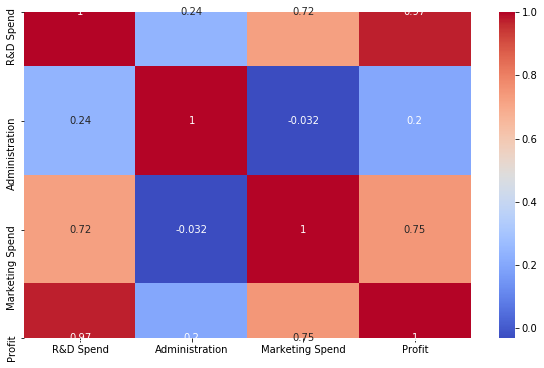

In [15]:
#Correlation matrix
import seaborn as sns
%matplotlib inline
corr= ds.corr()
plt.figure (figsize=(10,6))
sns.heatmap(corr,annot= True, cmap = 'coolwarm')
##we understand from this matrix that RnD and Profit are linearly related the most.

# Creating dependant and independant vectors for features 

In [6]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1:].values
print(y)

[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14]
 [ 81229.06]
 [ 81005.76]
 [ 78239.91]
 [ 77798.83]
 [ 71498.49]
 [ 69758.98]
 [ 65200.33]
 [ 64926.08]
 [ 49490.75]
 [ 42559.73]
 [ 35673.41]
 [ 14681.4 ]]


## Perform OneHotEncoding to convert categorical Variables into Numericals ones

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Split into train and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Fit into Model-> Multiple Linear regression uses the same code and logic as the Simple LR model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)# fit method takes two input. it predicts y based on data of x

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test the results

In [13]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [ ]:
#concatenate method will the two columns of y_pred and y_test so that it is visually easy to compare
#It has two arguments=(arrays, axis-1 for vertical)
#reshape is used to set the data vertically or horizontally.(len(data), no of columns)